<h1 align="center">
    Regresión Lineal
</h1>

El modelo de regresion lineal es un modelo matematico, usado para aproximar la relacion de dependecia, entre una variable independiente, numerica y continua Y, y las variables dependientes X, asi com un termino aleatorio $\varepsilon$, que corresponde al error o ruido en nuestros modelos.
<br>
El objetivo final de este modelo es minimizar la distancia cuadratica de todos los puntos en relacion a una recta, la recta de regresion.
<br>
A la variable y se le llama independiente, pero tambien vas a escuchar respuesta, a las explicativas o regresoras X, tambien se les puede llamar dependientes.
<center>
    <br>
$y_=B_0 + B_1X_1 + B_2X_2+B_3X_3+...+\varepsilon$
    <br>
    <br>
$Independiente = Explicativas o Regresoras + Error$

## Supuestos Teoricos
- Relacion Lineal entre las variables, al incremetar x unidades una de las variables regresoras, se incremente en promedio betha veces la variable respuesta.
- Errores Independientes, es decir que los errores en la mediciones de las variables explicativas son independientes entre sí, tambien se asume que las variables explicativas no estan relacionadas linealmente entre ellas.
- Homocedasticidad, varianza constante, o que los errores son homocedasticos, en lenguaje llano, implica que si intentamos predecir los salarios en base en la edad, vamos a encontrar errores de la misma magnitud para gente joven, que para gente mayor.
- E($\varepsilon$) = 0, que los errores tengan una esperanza matematica igual a 0, los errores no van a tener una sistematicamente tendencia positiva o negativa, es decir, vamos a predecir algunos casos por encima de su valor real y algunos por debajo, pero nunca todos por arriba o todos por abajo.
- Error Total = $\sum \varepsilon_i$, que el error total, sea la suma de todos los errores. 

In [1]:
# Ejemplo Predecir el  retraso en las aereolineas EEUU.

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
df = pd.read_csv('C:/Users/jorge/Desktop/Linkedin DATASCIENCE/CURSO/data/2008.csv')


In [4]:
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

print("Coeficientes: ", regr.coef_)
Y_pred = regr.predict(X)
print("R Cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [1.02200951]
R Cuadrado:  0.8636254579197844


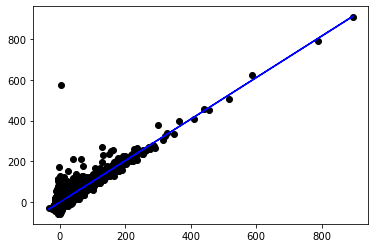

In [6]:
plt.scatter(X[1:10000], Y[1:10000], color="black")
plt.plot(X[1:10000],Y_pred[1:10000], color= "Blue")
plt.show()

In [8]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']]
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

#una variable dummy, es una variable que toma valor 1 o 0, en función
#de si aparece la categoria que estamos estudiando.
dummies = pd.get_dummies(data=df[['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest']])
X = dummies.add(X, fill_value=0)

In [9]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=650)

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#print("Coeficientes: ", regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado:", r2_score(Y, Y_pred))

R cuadrado: 0.1881153916958418


In [12]:
X = X.add(df[["DepDelay"]],fill_value=0)

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#print("Coeficientes: ", regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado:", r2_score(Y, Y_pred))

R cuadrado: 0.9713156514443347
